In [1]:
import os 
import json
import pprint
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [2]:
with open('/kaggle/input/squadv2/train-v2.0 (1).json') as json_file:
    train_data = json.load(json_file)

In [3]:
#What is the structure of the file
pprint.pprint(train_data['data'][0])

{'paragraphs': [{'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ '
                            'bee-YON-say) (born September 4, 1981) is an '
                            'American singer, songwriter, record producer and '
                            'actress. Born and raised in Houston, Texas, she '
                            'performed in various singing and dancing '
                            'competitions as a child, and rose to fame in the '
                            'late 1990s as lead singer of R&B girl-group '
                            "Destiny's Child. Managed by her father, Mathew "
                            "Knowles, the group became one of the world's "
                            'best-selling girl groups of all time. Their '
                            "hiatus saw the release of Beyoncé's debut album, "
                            'Dangerously in Love (2003), which established her '
                            'as a solo artist worldwide, earned five Gram

In [4]:
#Count the number of questions 
def count_questions(data):
    num_questions = []
    num_paragraphs = [] 
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        num_paragraphs.append(paragraphs)
        for j in range(paragraphs):
            questions = len(data['data'][i]['paragraphs'][j]['qas'])
            num_questions.append(questions)
    print("Num Paragraphs:", sum(num_paragraphs))
    print('Num Questions:', sum(num_questions))
    return num_questions, sum(num_questions)

In [5]:
# count number of questions:
num_list, num_questions = count_questions(train_data)
print("Fewest Questions:", min(num_list))
print("Most Questions:", max(num_list))

Num Paragraphs: 19035
Num Questions: 130319
Fewest Questions: 1
Most Questions: 30


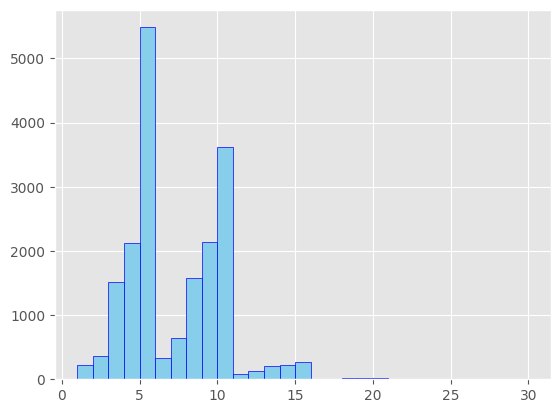

In [6]:
def question_hist(num_list, bin_width):
    binwidth = bin_width
    plt.hist(num_list, 
             bins = range(min(num_list),
                         max(num_list)+binwidth,
                         binwidth),
            color = 'skyblue', ec='blue')
    plt.show()
    
question_hist(num_list, 1)

In [7]:
#How many are "impossible"
def count_impossible(data):
    count = 0
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            questions = len(data['data'][i]['paragraphs'][j]['qas'])
            for k in range(questions):
                if data['data'][i]['paragraphs'][j]['qas'][k]['is_impossible'] == True:
                    count += 1
    return(count)


Number Impossible 43498
Number Possible 86821


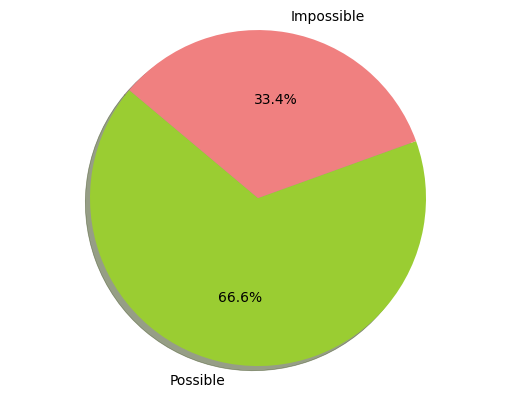

In [8]:
#Count number possible/impossible
num_impossible = count_impossible(train_data)
num_possible = num_questions-num_impossible

print('Number Impossible', num_impossible)
print('Number Possible', num_possible)

def pie_possible(possible, impossible):
    labels = ['Possible','Impossible']
    sizes = [possible, impossible]
    colors = ['yellowgreen', 'lightcoral']
    plt.pie(sizes, labels = labels, colors = colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    
pie_possible(num_possible, num_impossible)

In [9]:
#How long are the contexts
def context_length(data):
    lengths = []
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            length = len(data['data'][i]['paragraphs'][j]['context'])
            lengths.append(length)
    print('Total Context Chars', sum(lengths))
    print('Average Context Length', round((sum(lengths)/len(lengths)),2))
    return lengths

context_lengths = context_length(train_data)
print('Shortest Context', min(context_lengths))
print('Longest Context', max(context_lengths))

Total Context Chars 14001154
Average Context Length 735.55
Shortest Context 151
Longest Context 3706


In [10]:
#Take a look at the longest conext to get an idea. 

def longest_context(data):
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            length = len(data['data'][i]['paragraphs'][j]['context'])
            if length == max(context_lengths):
                print(data['data'][i]['paragraphs'][j]['context'])
                
longest_context(train_data)

The sky is usually clear above the desert and the sunshine duration is extremely high everywhere in the Sahara. Most of the desert enjoys more than 3,600 h of bright sunshine annually or over 82% of the time and a wide area in the eastern part experiences in excess of 4,000 h of bright sunshine a year or over 91% of the time, and the highest values are very close to the theoretical maximum value. A value of 4,300 h or 98% of the time would be recorded in Upper Egypt (Aswan, Luxor) and in the Nubian Desert (Wadi Halfa). The annual average direct solar irradiation is around 2,800 kWh/(m2 year) in the Great Desert. The Sahara has a huge potential for solar energy production. The constantly high position of the sun, the extremely low relative humidity, the lack of vegetation and rainfall make the Great Desert the hottest continuously large area worldwide and certainly the hottest place on Earth during summertime in some spots. The average high temperature exceeds 38 °C (100.4 °F) - 40 °C (

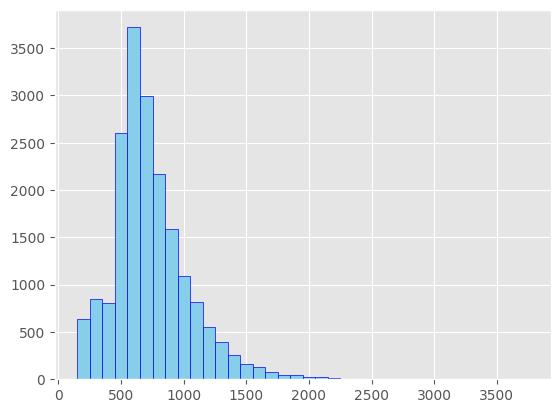

In [11]:
def context_hist(context_lengths, bin_width):
    binwidth = bin_width
    plt.hist(context_lengths, 
             bins = range(min(context_lengths),
                         max(context_lengths)+binwidth,
                         binwidth),
            color = 'skyblue', ec='blue')
    plt.show()
    
context_hist(context_lengths, 100)

In [12]:
# Question LENGTH
# Look at the length of the answers
# get a hist of the length of the answers
# take a look at the longest/shortest answer

def question_length(data):
    lengths = []
    short_indexes = []
    long_indexes = []
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            qas = len(data['data'][i]['paragraphs'][j]['qas'])
            for k in range(qas):
                length=(len(data['data'][i]['paragraphs'][j]['qas'][k]['question']))
                if length < 5:
                    short_indexes.append([i,j,k])
                if length > 500:
                    long_indexes.append([i,j,k])
                    
                lengths.append(length)
    print('Average Question Length', round((sum(lengths)/len(lengths)),2))
    return lengths, short_indexes, long_indexes

q_length, short_qs, long_qs = question_length(train_data)
print('Shortest Question (characters)', min(q_length))
print('Shortest Question (characters)', max(q_length))

Average Question Length 58.51
Shortest Question (characters) 1
Shortest Question (characters) 25651


In [13]:
for i,j,k in short_qs:
    print('\nIndexes:', i,j,k)
    print("Short Example:", train_data['data'][i]['paragraphs'][j]['qas'][k]['question'])
    
for i,j,k in long_qs:
    print('\nIndexes:', i,j,k)
    print("Long Example:", train_data['data'][i]['paragraphs'][j]['qas'][k]['question'])    


Indexes: 174 0 5
Short Example: dd

Indexes: 174 0 6
Short Example: d

Indexes: 367 13 1
Long Example:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [14]:
longest_example = train_data['data'][367]['paragraphs'][13]['qas'][1]['question']
print(longest_example)
#There are about 25,000 spaces on this for some reason. 

In [15]:
#The long example is obviously an error so lets remove it before plotting.
q_length.remove(max(q_length))


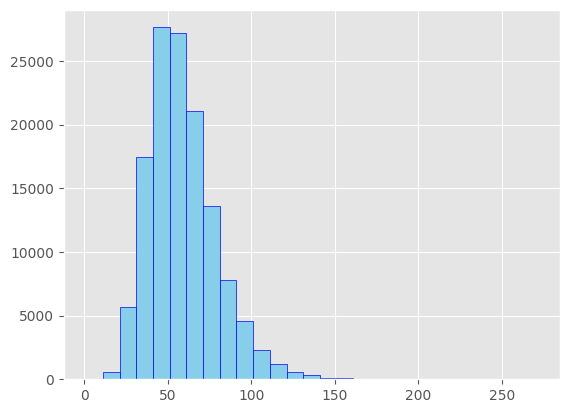

In [16]:
# Now I can plot hist of the lengths. 

question_hist(q_length, 10)

In [17]:
# CHARACTER/WORD TYPE
# go to word or char in context and see how many are numbers, letters, 
# or special characters.
# look at the same thing for the answer texts to see if they are the same 
# as the overall distrobution 

def character_type(data):
    numbers = 0
    letters = 0
    spaces = 0
    upper_case = 0
    total = 0
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            context = data['data'][i]['paragraphs'][j]['context']
            numbers += sum(c.isdigit() for c in context)
            letters += sum(c.isalpha() for c in context)
            spaces += sum(c.isspace() for c in context)
            upper_case += sum(c.isupper() for c in context)
            total += len(context)
    special = (total - (numbers + letters + spaces))
    print("Total Numbers:", numbers)
    print("Total Letters:", letters)
    print("Total Special:", special)
    return numbers, letters, spaces, total, special, upper_case

num, let, space, tot, spec, upper = character_type(train_data)

# make a pie chart showing the breakdown of num/letters/other
# (exclude the long outlier)


Total Numbers: 198415
Total Letters: 11218808
Total Special: 383530


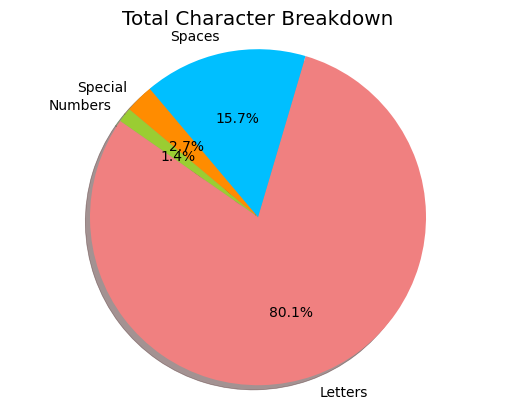

Percent Uppercased: 4.04%


In [18]:
# Show pie chart with results for the character break down

def pie_characters(numbers, letters, spaces, special, title):
    labels = ['Numbers','Letters', "Spaces", "Special"]
    sizes = [numbers, letters, spaces, special]
    colors = ['yellowgreen', 'lightcoral', 'deepskyblue', 'darkorange']
    plt.pie(sizes, labels = labels, colors = colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()
    
pie_characters(num, let, space, spec, "Total Character Breakdown")
print("Percent Uppercased:", "{:.2%}".format(upper/let))

In [19]:
# COMPARE ANSWER TEXT
# Look at the answers, does the answer text follow the same trends as the context?

def question_chars(data, q_or_a):
    numbers = 0
    letters = 0
    spaces = 0
    upper_case = 0
    total = 0
    impossible_index = []
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            questions = len(data['data'][i]['paragraphs'][j]['qas'])
            for k in range(questions):
                if q_or_a == 'question':           
                    context = data['data'][i]['paragraphs'][j]['qas'][k]['question'] 
                elif q_or_a == 'answer':
                    if data['data'][i]['paragraphs'][j]['qas'][k]['is_impossible'] == True:
                        impossible_index.append([i,j,k])
                    else:
                        context = data['data'][i]['paragraphs'][j]['qas'][k]['answers'][0]['text']
                else:
                    print("invalid entry! Please input question or answer")
                numbers += sum(c.isdigit() for c in context)
                letters += sum(c.isalpha() for c in context)
                spaces += sum(c.isspace() for c in context)
                upper_case += sum(c.isupper() for c in context)
                total += len(context)
    special = (total - (numbers + letters + spaces))
    print("Total Numbers:", numbers)
    print("Total Letters:", letters)
    print("Total Special:", special)
    return numbers, letters, spaces, total, special, upper_case, impossible_index

q_num, q_let, q_space, q_total, q_spec, q_upp, q_imp = question_chars(train_data, 'question')
a_num, a_let, a_space, a_total, a_spec, a_upp, q_imp = question_chars(train_data, 'answer')

# COMPARE IMPOSSIBLE
# Are the impossible questions any different.


Total Numbers: 61892
Total Letters: 6201158
Total Special: 169974
Total Numbers: 102137
Total Letters: 2322815
Total Special: 47112


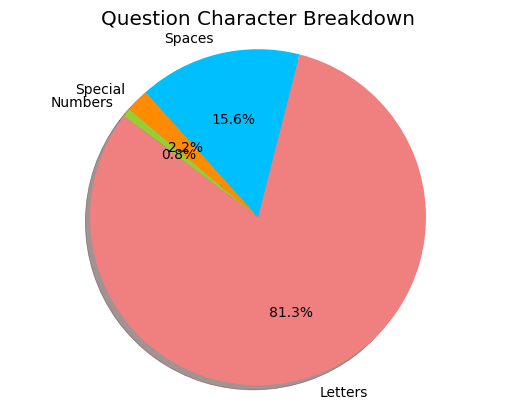

Percent Uppercased: 5.26%


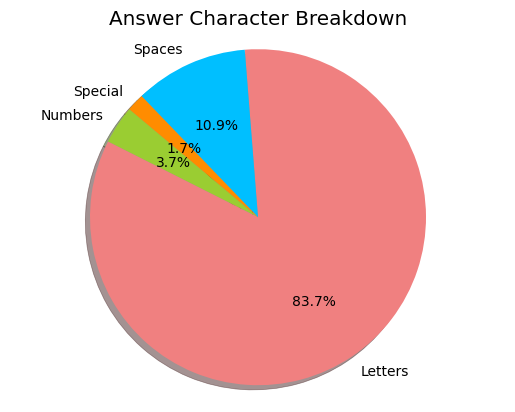

Percent Uppercased: 6.24%


In [20]:
pie_characters(q_num, q_let, q_space, q_spec, "Question Character Breakdown")
print("Percent Uppercased:", "{:.2%}".format(q_upp/q_let))

pie_characters(a_num, a_let, a_space, a_spec, "Answer Character Breakdown")
print("Percent Uppercased:", "{:.2%}".format(a_upp/a_let))

In [21]:
# We see that numbers are very rare in questions, but very common in questions.
# they occur more than twice as often in answers as they do in context.

# We also see that upper cases letters are much more common in both questions
# and answers than they are in the overall context.  This suggests I would be best
# off using the Cased verison of BERT. 

In [22]:
#Take a look at some of the impossible examples.

for _ in range(5):
    example = random.choice(q_imp)
    print('\nIndexes:', example)
    print('\nConext:', train_data['data'][example[0]]['paragraphs'][example[1]]['context'])
    print("\nImpossible Question:", train_data['data'][example[0]]['paragraphs'][example[1]]['qas'][example[2]]['question'])
    


Indexes: [247, 21, 7]

Conext: In 2007, the country with the highest estimated incidence rate of TB was Swaziland, with 1,200 cases per 100,000 people. India had the largest total incidence, with an estimated 2.0 million new cases. In developed countries, tuberculosis is less common and is found mainly in urban areas. Rates per 100,000 people in different areas of the world were: globally 178, Africa 332, the Americas 36, Eastern Mediterranean 173, Europe 63, Southeast Asia 278, and Western Pacific 139 in 2010. In Canada and Australia, tuberculosis is many times more common among the aboriginal peoples, especially in remote areas. In the United States Native Americans have a fivefold greater mortality from TB, and racial and ethnic minorities accounted for 84% of all reported TB cases.

Impossible Question: What is mostly found in remote areas in developed countries?

Indexes: [37, 18, 6]

Conext: The Chinese word is 基督徒 (pinyin: jīdū tú), literally "Christ follower." The two characte

In [23]:
# DEV SET - Repeat above
# Count number of questions.
# Impossible with percent
# Average context length
# Average number of questions per context
# Answer lenght
# Text breakdown
%ls

In [24]:
with open('/kaggle/input/squadv2dev/dev-v2.0.json') as json_file:
    dev_data = json.load(json_file)

Num Paragraphs: 1204
Num Questions: 11873
Fewest Questions: 3
Most Questions: 28


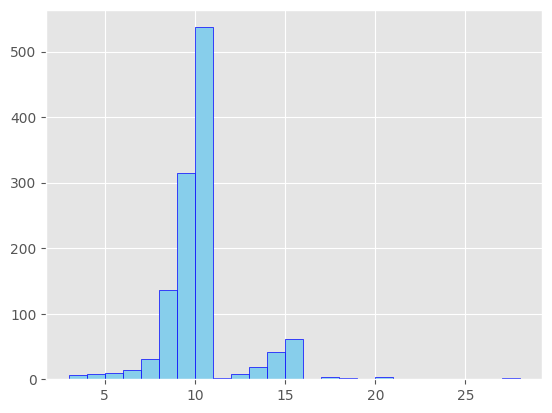

In [25]:
num_list, num_questions = count_questions(dev_data)
print("Fewest Questions:", min(num_list))
print("Most Questions:", max(num_list))
question_hist(num_list, 1)

In [26]:
context_lengths = context_length(dev_data)
print('Shortest Context', min(context_lengths))
print('Longest Context', max(context_lengths))

longest_context(dev_data)

Total Context Chars 966345
Average Context Length 802.61
Shortest Context 169
Longest Context 4063
The "freedom to provide services" under TFEU article 56 applies to people who give services "for remuneration", especially commercial or professional activity. For example, in Van Binsbergen v Bestuur van de Bedrijfvereniging voor de Metaalnijverheid a Dutch lawyer moved to Belgium while advising a client in a social security case, and was told he could not continue because Dutch law said only people established in the Netherlands could give legal advice. The Court of Justice held that the freedom to provide services applied, it was directly effective, and the rule was probably unjustified: having an address in the member state would be enough to pursue the legitimate aim of good administration of justice. The Court of Justice has held that secondary education falls outside the scope of article 56, because usually the state funds it, though higher education does not. Health care generally

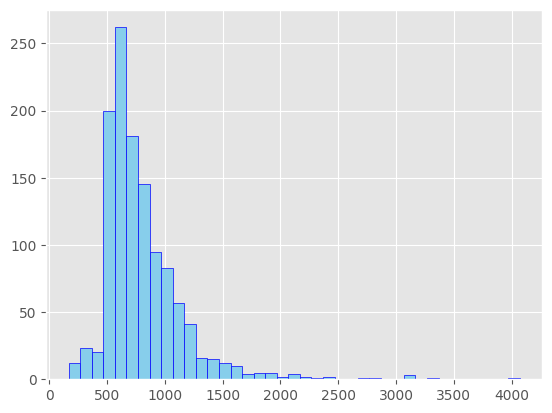

In [27]:
context_hist(context_lengths, 100)

In [28]:
q_length, short_qs, long_qs = question_length(dev_data)
print('Shortest Question (characters)', min(q_length))
print('Longest Question (characters)', max(q_length))

for i,j,k in short_qs:
    print('\nIndexes:', i,j,k)
    print("Short Example:", dev_data['data'][i]['paragraphs'][j]['qas'][k]['question'])
    
for i,j,k in long_qs:
    print('\nIndexes:', i,j,k)
    print("Long Example:", dev_data['data'][i]['paragraphs'][j]['qas'][k]['question']) 
    
#There are no extra long or short examples in the dev set.     

Average Question Length 59.51
Shortest Question (characters) 12
Longest Question (characters) 197


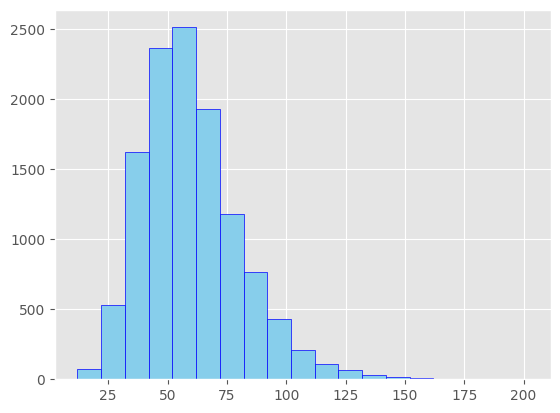

In [29]:
question_hist(q_length, 10)

Total Numbers: 11405
Total Letters: 778854
Total Special: 24871


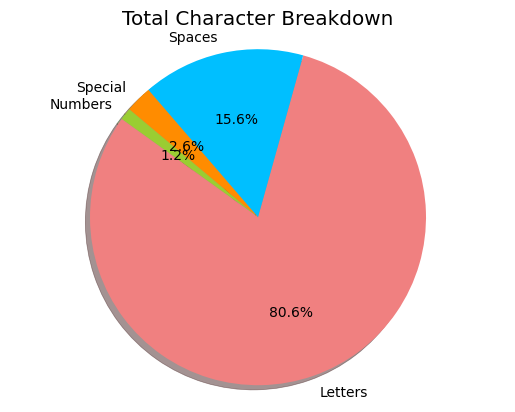

Percent Uppercased: 3.65%


In [30]:
num, let, space, tot, spec, upper = character_type(dev_data)
pie_characters(num, let, space, spec, "Total Character Breakdown")
print("Percent Uppercased:", "{:.2%}".format(upper/let))

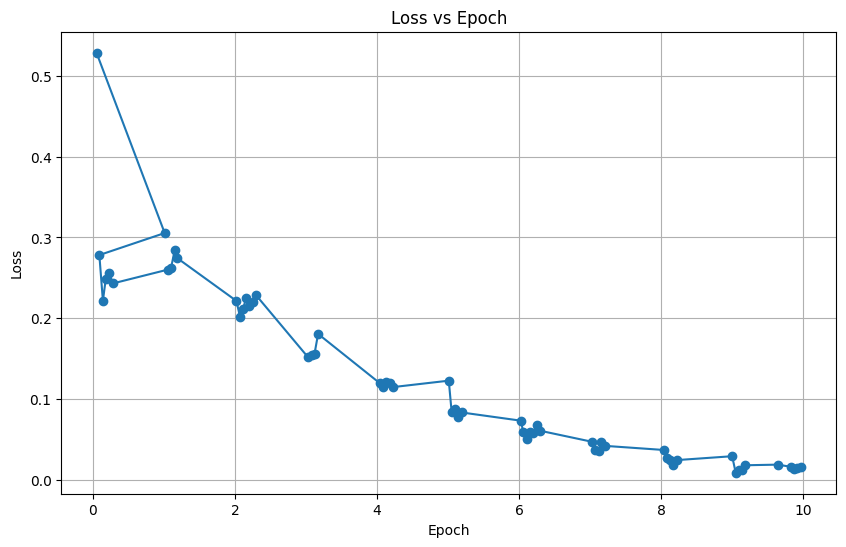

In [2]:
import matplotlib.pyplot as plt

# Provided data
data = [
    {'loss': 0.5283, 'epoch': 0.05},
    {'loss': 0.3054, 'epoch': 1.01},
    {'loss': 0.2782, 'epoch': 0.09},
    {'loss': 0.2217, 'epoch': 0.14},
    {'loss': 0.2483, 'epoch': 0.18},
    {'loss': 0.2561, 'epoch': 0.23},
    {'loss': 0.2431, 'epoch': 0.28},

    {'loss': 0.2603, 'epoch': 1.06},
    {'loss': 0.2622, 'epoch': 1.1},
    {'loss': 0.2841, 'epoch': 1.15},
    {'loss': 0.2742, 'epoch': 1.19},
    {'loss': 0.2215, 'epoch': 2.02},
    {'loss': 0.2021, 'epoch': 2.07},
    {'loss': 0.2115, 'epoch': 2.11},
    {'loss': 0.2252, 'epoch': 2.16},
    {'loss': 0.215, 'epoch': 2.2},
    {'loss': 0.2207, 'epoch': 2.25},
    {'loss': 0.2282, 'epoch': 2.3},
    {'loss': 0.1517, 'epoch': 3.03},
    {'loss': 0.1544, 'epoch': 3.08},
    {'loss': 0.1563, 'epoch': 3.12},
    {'loss': 0.1807, 'epoch': 3.17},
    {'loss': 0.1197, 'epoch': 4.04},
    {'loss': 0.1153, 'epoch': 4.09},
    {'loss': 0.1218, 'epoch': 4.13},
    {'loss': 0.1194, 'epoch': 4.18},
    {'loss': 0.1149, 'epoch': 4.22},
    {'loss': 0.1229, 'epoch': 5.01},
    {'loss': 0.0845, 'epoch': 5.05},
    {'loss': 0.0875, 'epoch': 5.1},
    {'loss': 0.0786, 'epoch': 5.14},
    {'loss': 0.0836, 'epoch': 5.19},
    {'loss': 0.0735, 'epoch': 6.02},
    {'loss': 0.06, 'epoch': 6.06},
    {'loss': 0.0511, 'epoch': 6.11},
    {'loss': 0.0593, 'epoch': 6.15},
    {'loss': 0.0577, 'epoch': 6.2},
    {'loss': 0.0675, 'epoch': 6.25},
    {'loss': 0.0611, 'epoch': 6.29},
    {'loss': 0.0473, 'epoch': 7.03},
    {'loss': 0.0372, 'epoch': 7.07},
    {'loss': 0.0363, 'epoch': 7.12},
    {'loss': 0.0473, 'epoch': 7.16},
    {'loss': 0.0423, 'epoch': 7.21},
    {'loss': 0.0372, 'epoch': 8.04},
    {'loss': 0.0276, 'epoch': 8.08},
    {'loss': 0.0251, 'epoch': 8.13},
    {'loss': 0.019, 'epoch': 8.17},
    {'loss': 0.0247, 'epoch': 8.22},
    {'loss': 0.0295, 'epoch': 9.0},
    {'loss': 0.0091, 'epoch': 9.05},
    {'loss': 0.0124, 'epoch': 9.09},
    {'loss': 0.0128, 'epoch': 9.14},
    {'loss': 0.0183, 'epoch': 9.18},
    {'loss': 0.0191, 'epoch': 9.64},
    {'loss': 0.0164, 'epoch': 9.83},
    {'loss': 0.0132, 'epoch': 9.87},
    {'loss': 0.015, 'epoch': 9.92},
    {'loss': 0.0158, 'epoch': 9.97},
]

# Extract epochs and losses
epochs = [entry['epoch'] for entry in data]
losses = [entry['loss'] for entry in data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
